## Master Thesis Sander Broos analysis notebook

Analysis plots from example csv data of age feature and a grid plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
def bar_param(attr, dfa, metric="pir"):
    groups = dfa.groupby([attr])
    means, sems = groups.mean()[metric], groups.sem()[metric]
    print(f"# of samples to calculate means: {[group for group in groups.size()]}")

    x_values = np.array(list(groups.groups.keys()))
    
    plt.bar(x_values.astype(str), means, yerr=sems)
    plt.xlabel(attr)
    plt.ylabel(metric)
    
    plt.subplots_adjust(left=0, right=0.9, bottom=0, top=0.7)
    plt.xticks(fontsize=10, rotation=50)
    
    plt.show()

In [13]:
def split_bar_param(attr, dfa, metric="pir_age", stacked=True, small=False):
    attr_vals = sorted(dfa[attr].unique())

    index = pd.Index(attr_vals, name=attr)
    
    data = {col: [] for col in sorted(dfa.columns) if metric in col}
    
    for x in attr_vals:
        subset = dfa[dfa[attr] == x]
        for y in data.keys():
            data[y].append(np.mean(subset[y]))
    
    df = pd.DataFrame(data, index=index)
    
    diff_vals = []
    i_lowest = np.argmin(dfa.groupby([attr]).mean()[metric.split("_")[0]])
    for y in data.keys():
        temp_data = data[y]
        diff_vals.append(list(temp_data)[i_lowest]/list(temp_data)[0])
    plt.plot([int(key.strip(metric)) for key in data.keys()], diff_vals, label="Lowest/first")
    plt.xlabel(f"{metric.strip('pir_').strip('phr_')} group")
    plt.ylabel("Relative difference")
    plt.legend()
    plt.subplots_adjust(left=0, right=0.9, bottom=0, top=0.7)
    plt.show()
    
    diff_vals = []
    for y in data.keys():
        temp_data = data[y]
        diff_vals.append(list(temp_data)[-1]/list(temp_data)[0])
    plt.plot([int(key.strip(metric)) for key in data.keys()], diff_vals, label="Last/first")
    plt.xlabel(f"{metric.strip('pir_').strip('phr_')} group")
    plt.ylabel("Relative difference")
    plt.legend()
    plt.subplots_adjust(left=0, right=0.9, bottom=0, top=0.7)
    plt.show()

    ax = df.plot(kind='bar', width=0.75, stacked=stacked, figsize=((7, 4) if small else (11, 7)))
    ax.set_ylabel(metric)
    ax.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.show()

In [4]:
def shaded_plot(attr, dfa, metric="pir"):
    groups = dfa.groupby([attr])
    means, sems = groups.mean()[metric], groups.sem()[metric]
    print(f"# of samples to calculate means: {[group for group in groups.size()]}")

    x_values = np.array(list(groups.groups.keys()))
    
    plt.fill_between(x_values, means-sems, means+sems, alpha=0.5)
    plt.errorbar(x_values, means, yerr=sems, fmt='none', capsize=5, elinewidth=2, capthick=2)
    plt.ylim(0)
    
    plt.xlabel(attr)
    plt.ylabel(metric)
    plt.xscale("log")
    
    plt.xticks(fontsize=10, rotation=50)

    plt.show()

In [18]:
def grid_plot(dfa, attr1, attr2, metric="pir", cmap="RdYlBu_r", small=1.0):
    heatmap = np.zeros((len(dfa[attr1].unique()), len(dfa[attr2].unique())))

    for i, attr1_val in enumerate(sorted(dfa[attr1].unique())):
        for j, attr2_val in enumerate(sorted(dfa[attr2].unique())):
            subset = dfa[(dfa[attr1] == attr1_val) & (dfa[attr2] == attr2_val)]

            heatmap[i][j] = np.mean(subset[metric])
    plt.figure(figsize=(8*small, 6*small), dpi=200)
    plt.xticks(range(len(dfa[attr2].unique())), sorted(dfa[attr2].unique()), rotation=50)
    plt.yticks(range(len(dfa[attr1].unique())), sorted(dfa[attr1].unique()))

    plt.xlabel(attr2)
    plt.ylabel(attr1)

    plt.imshow(heatmap, cmap=cmap, interpolation='nearest', origin="lower")
    plt.colorbar()
    plt.show()

In [6]:
subset = pd.read_csv('split_age_test.csv')

In [7]:
df_age = pd.read_csv('example_age.csv')

# of samples to calculate means: [80, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100]


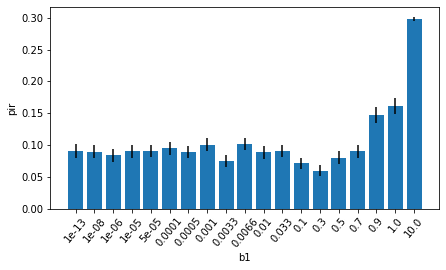

# of samples to calculate means: [80, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100]


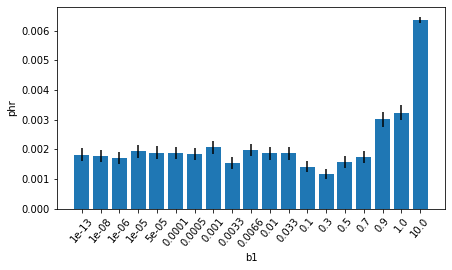

# of samples to calculate means: [80, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100]


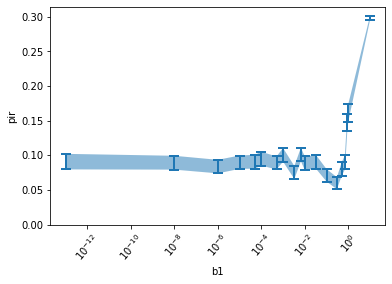

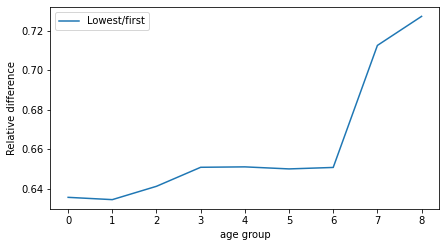

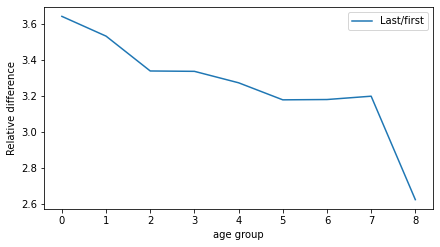

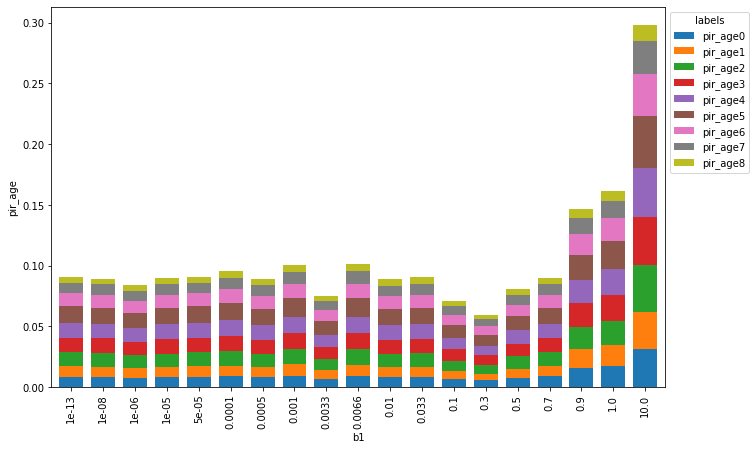

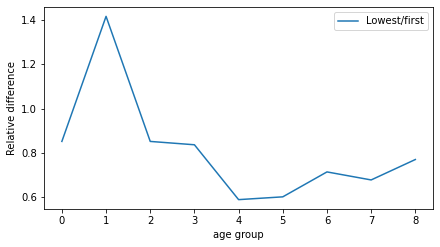

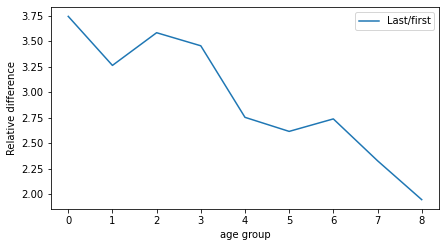

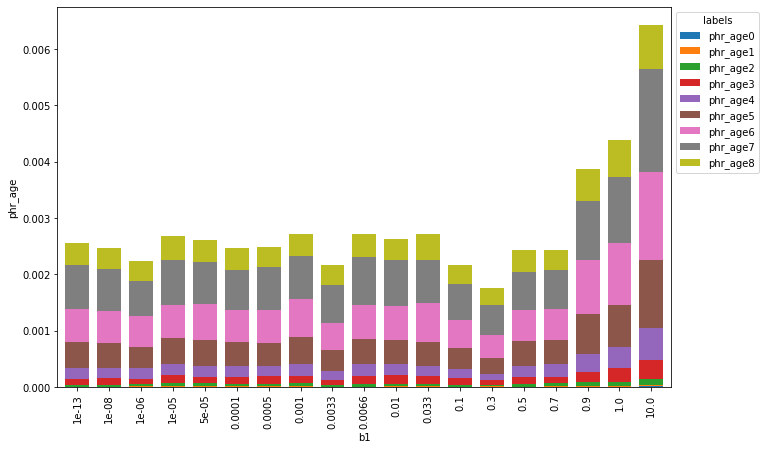

In [14]:
bar_param("b1", df_age)
bar_param("b1", df_age, "phr")
shaded_plot("b1", df_age, "pir")
split_bar_param("b1", df_age, stacked=True, small=False)
split_bar_param("b1", df_age, "phr_age", stacked=True, small=False)

In [9]:
df_grid = pd.read_csv('example_grid.csv')

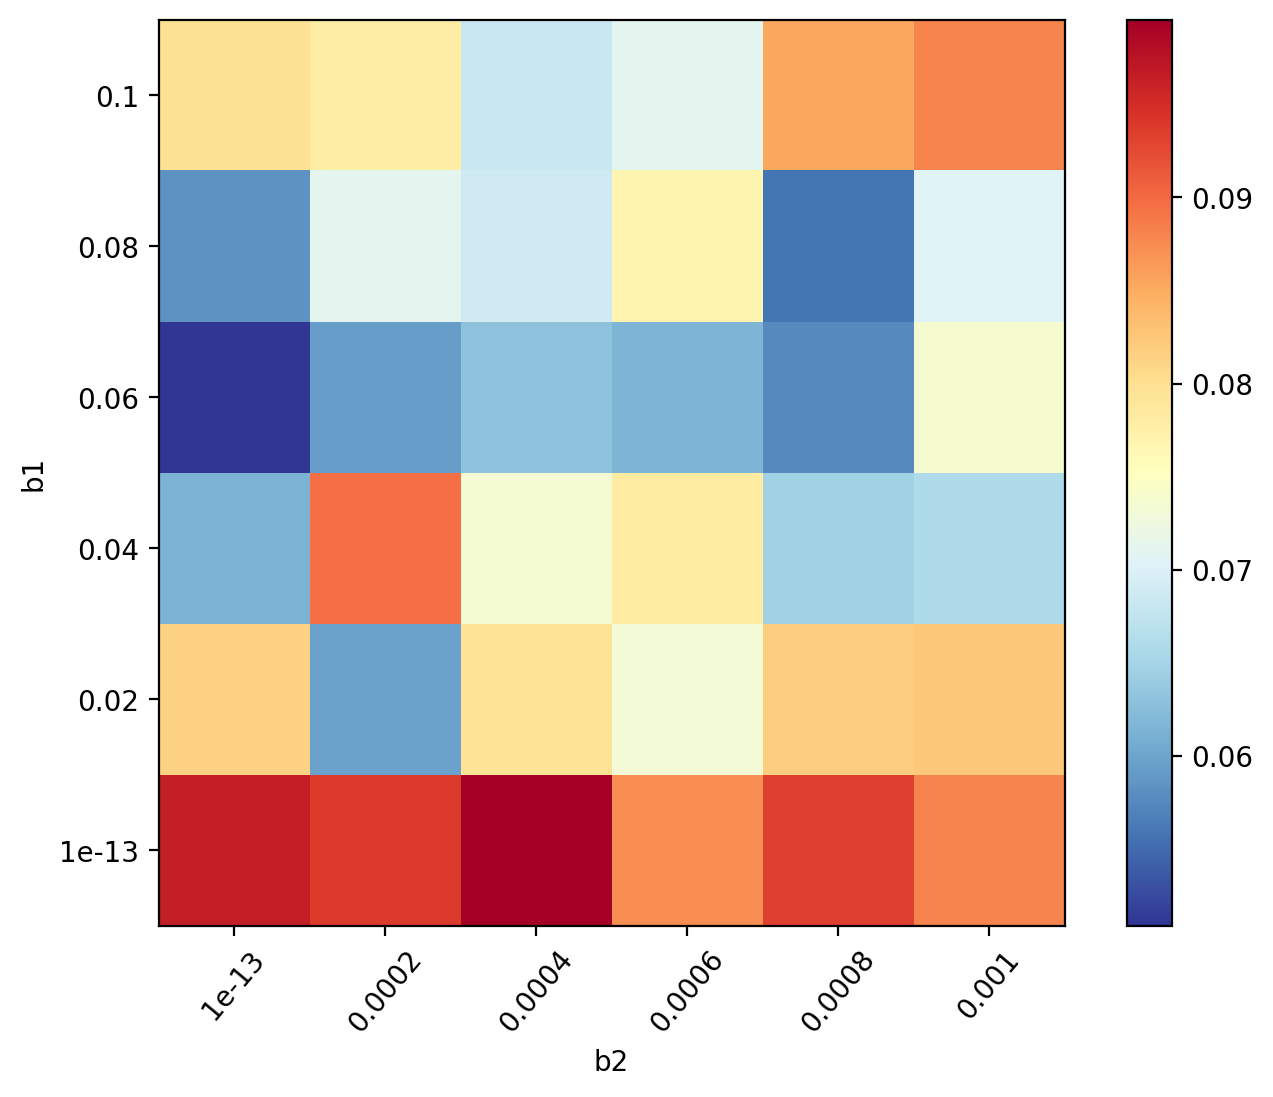

In [19]:
grid_plot(df_grid, "b1", "b2")